https://universe.roboflow.com/workenv-dayet/facial-emotion-dataset-7g1jd-hipbk

In [1]:
!nvidia-smi

Thu Nov 28 04:37:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              47W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 17.7 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 32.6/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("workenv-dayet").project("facial-emotion-dataset-7g1jd-hipbk")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Facial-Emotion-Dataset--3 in yolov11:: 100%|██████████| 2466/2466 [00:00<00:00, 7821.41it/s]


In [6]:
dataset.location

'/content/Facial-Emotion-Dataset--3'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 65.7MB/s]
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Facial-Emotion-Dataset--3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

**Step # 05 Examine Training Results**

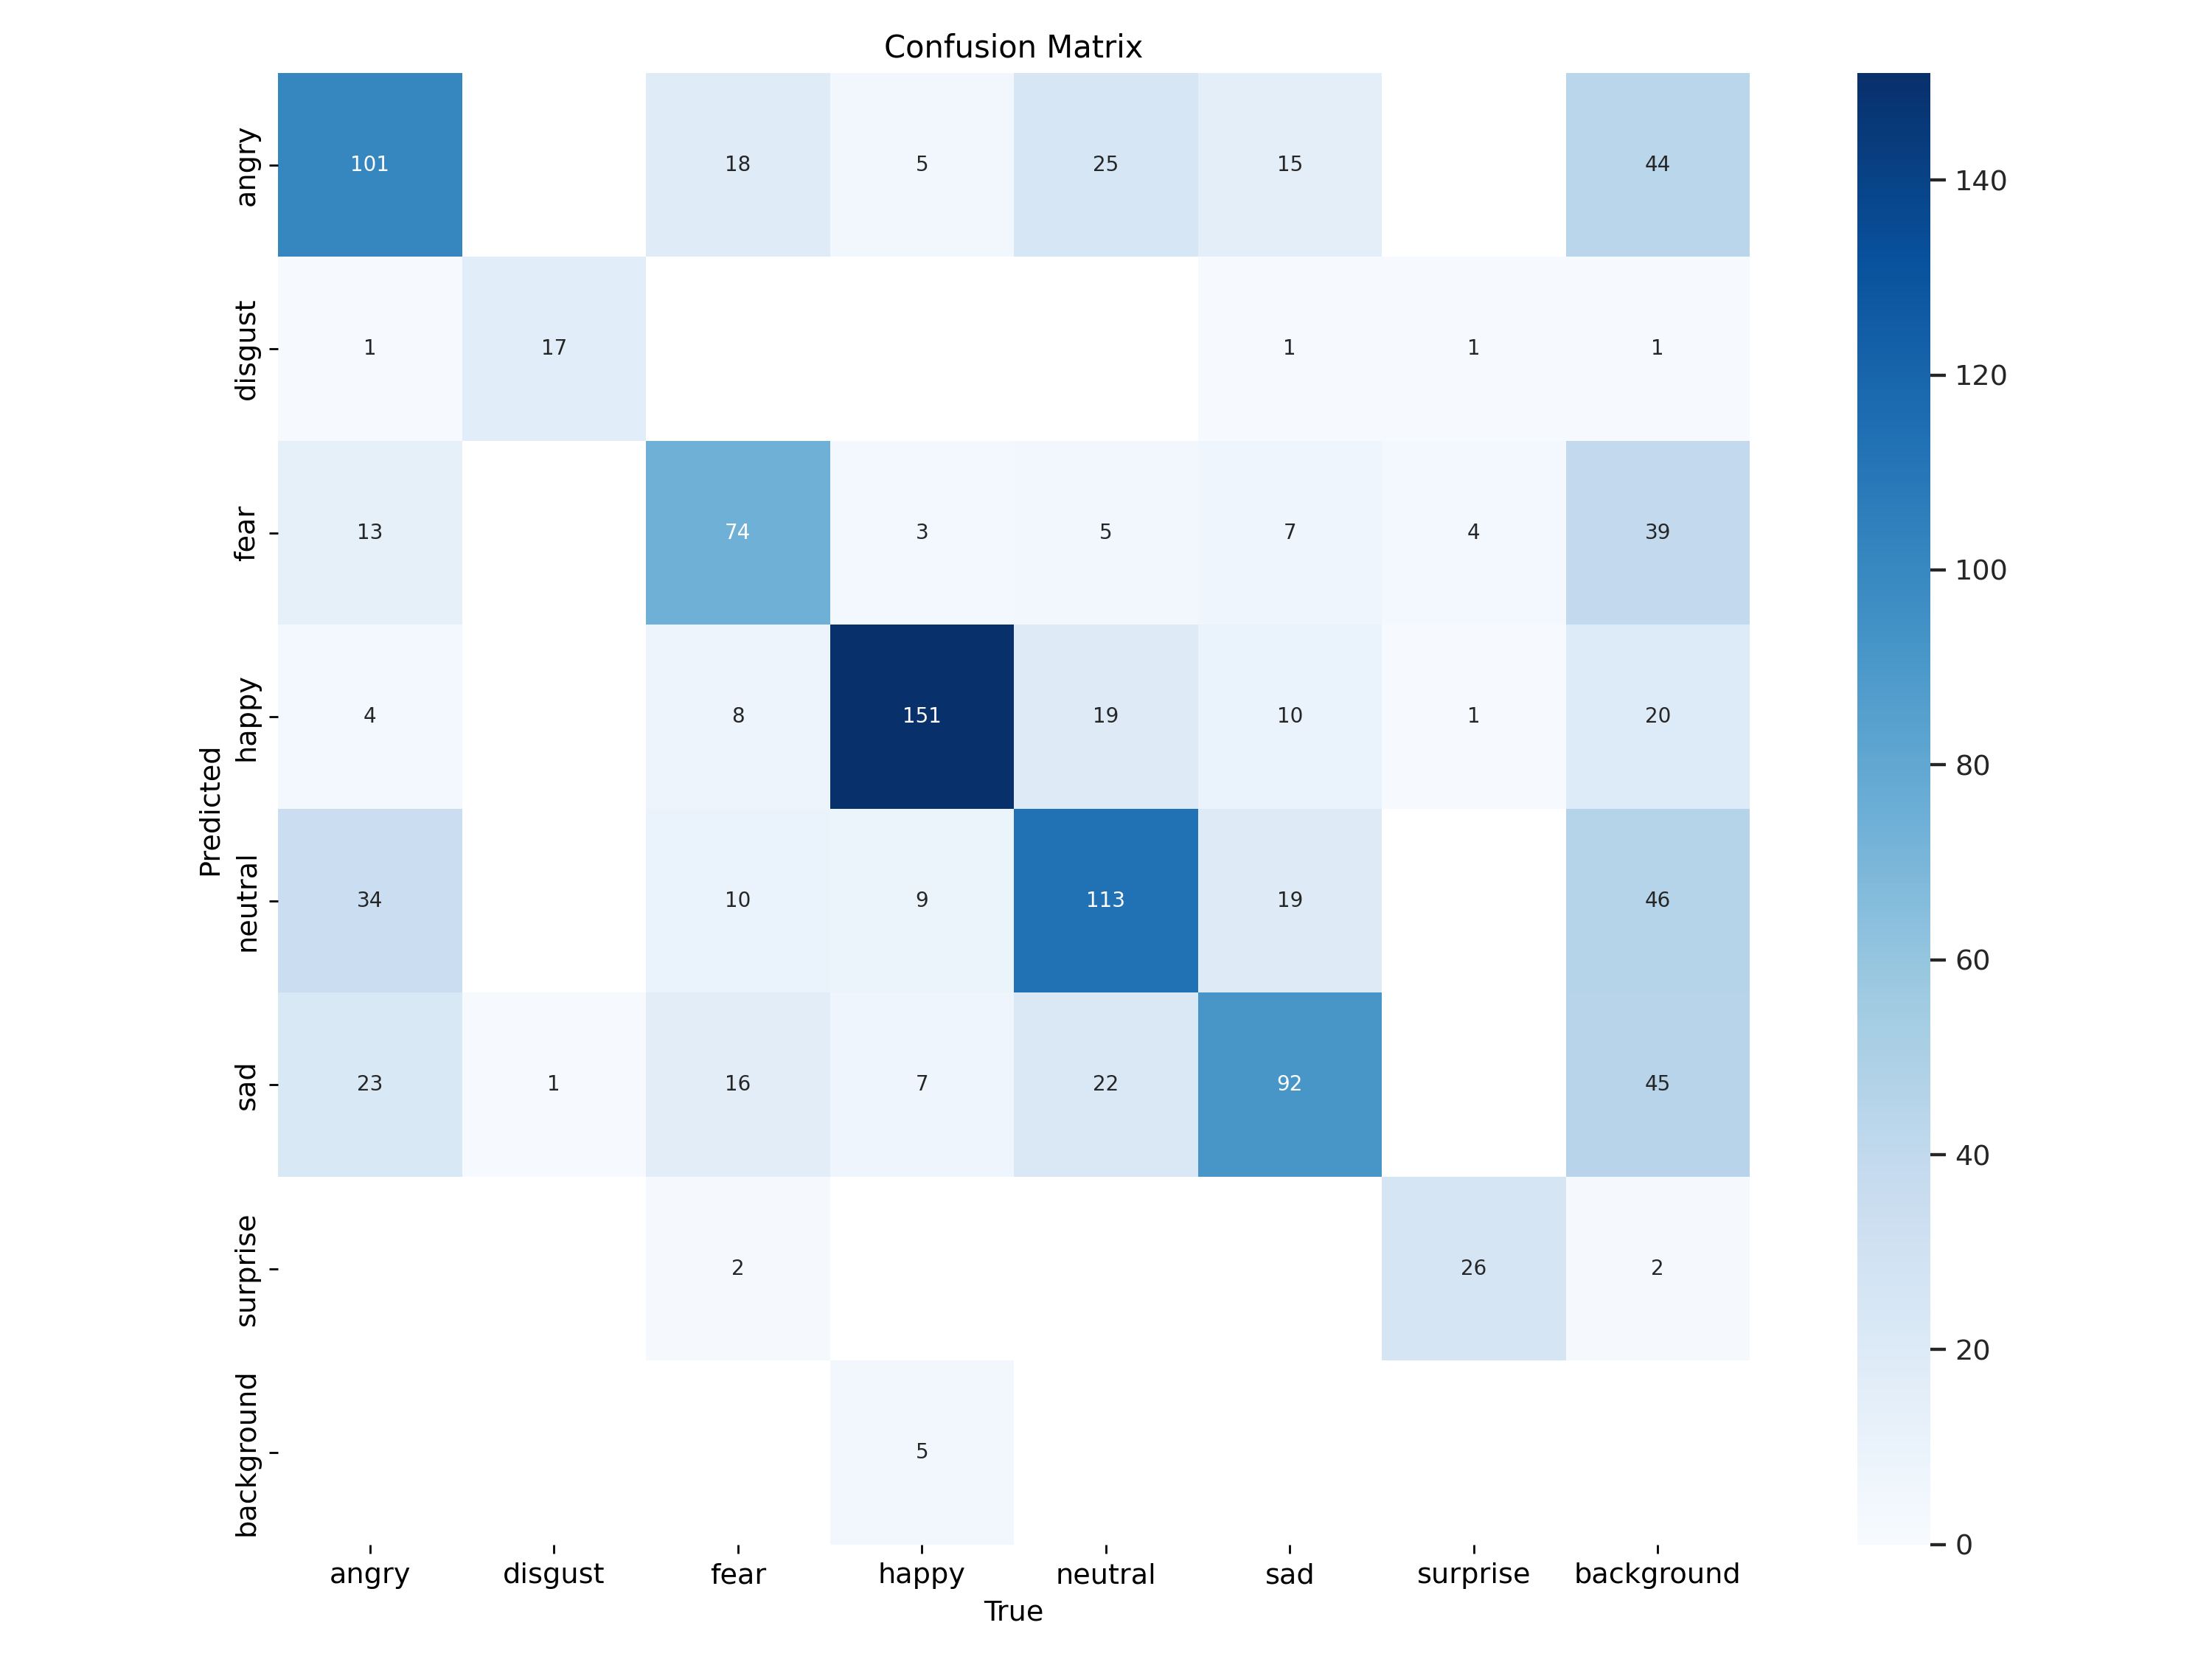

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

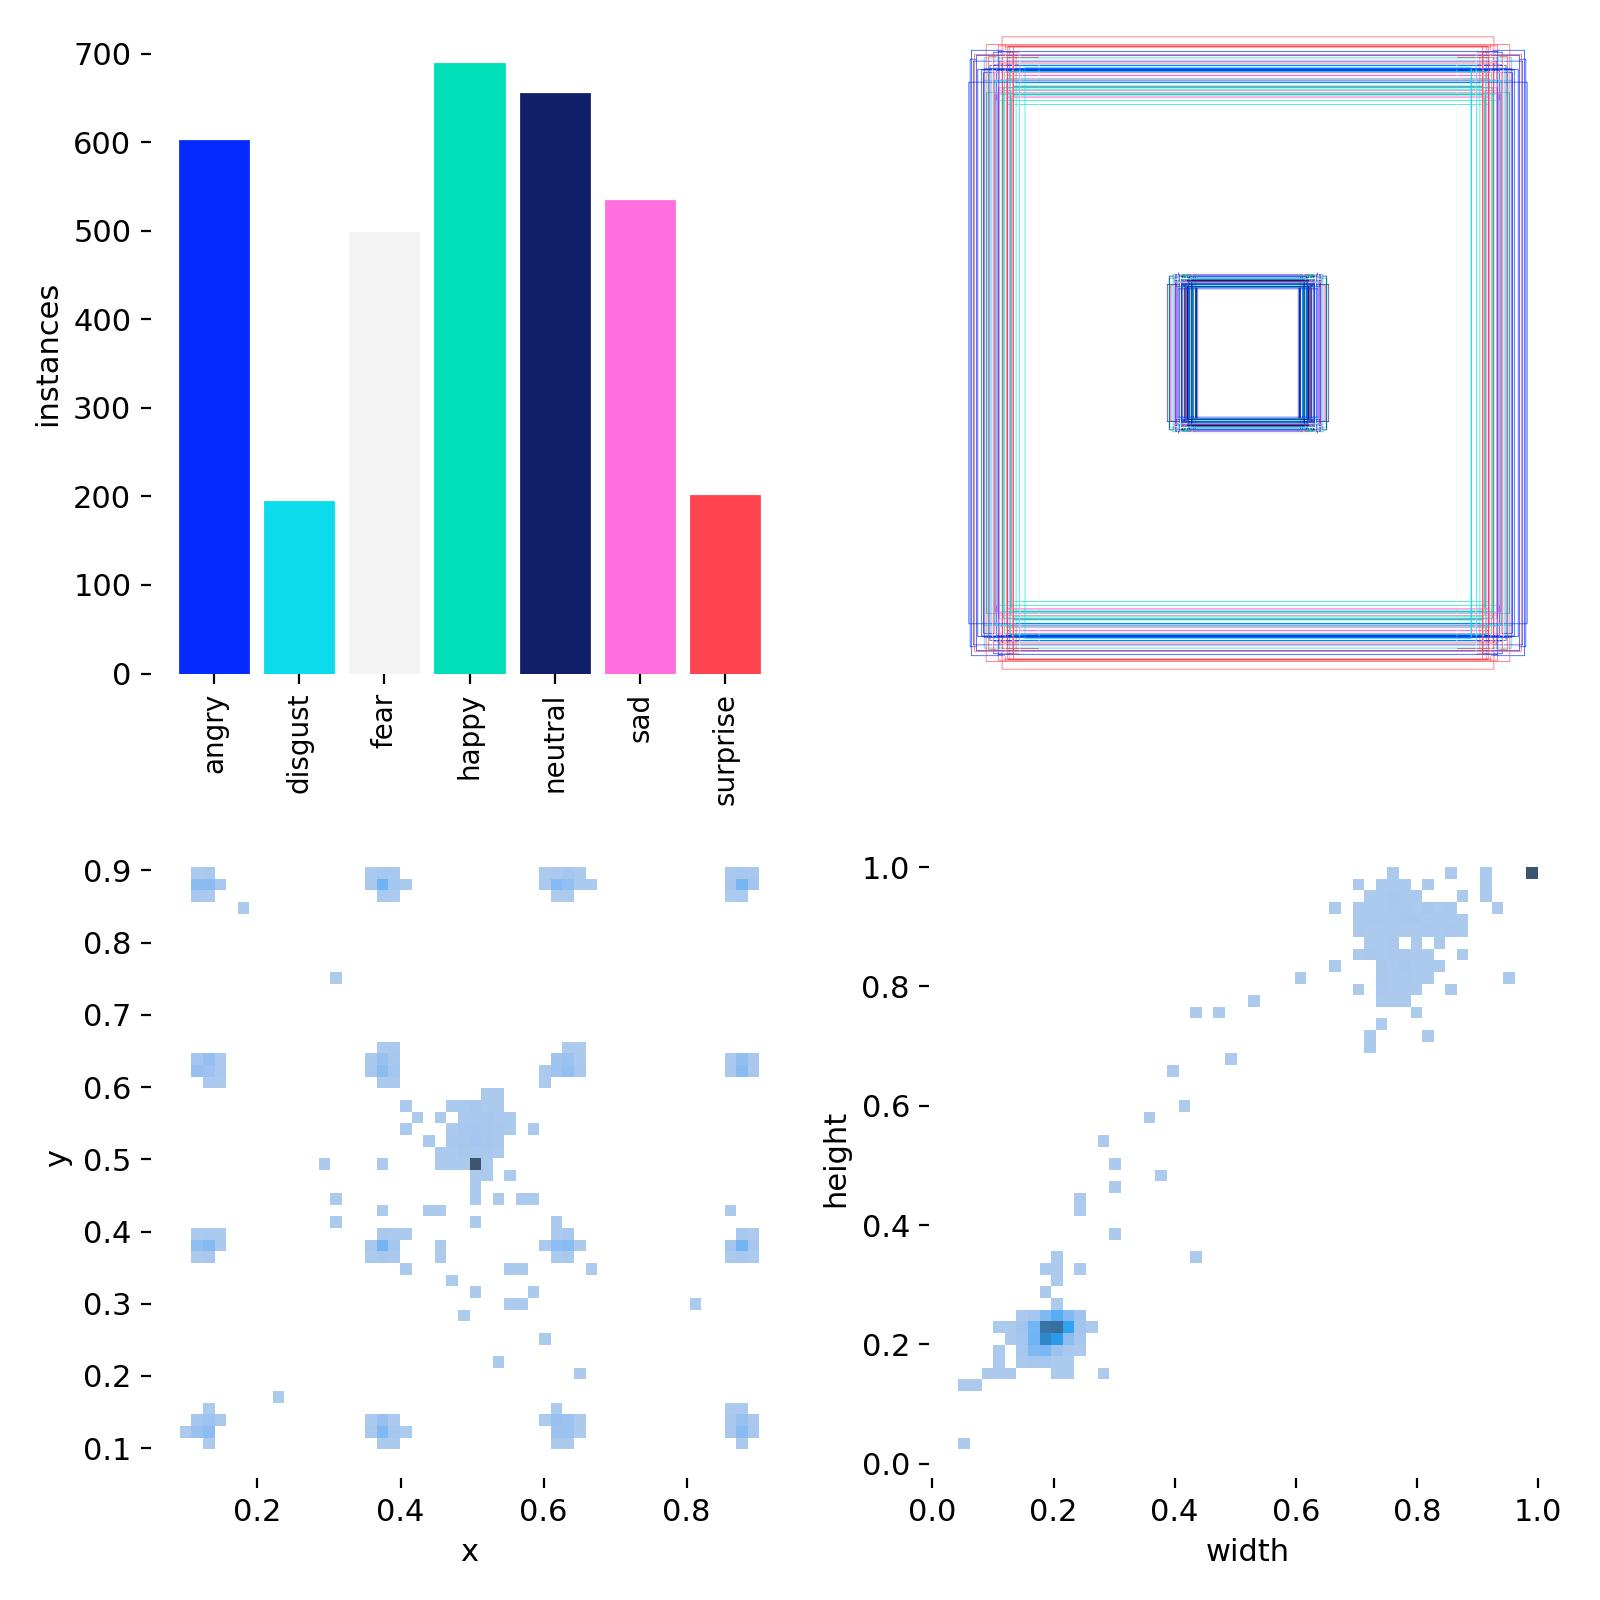

In [9]:
Image("/content/runs/detect/train/labels.jpg", width=600)

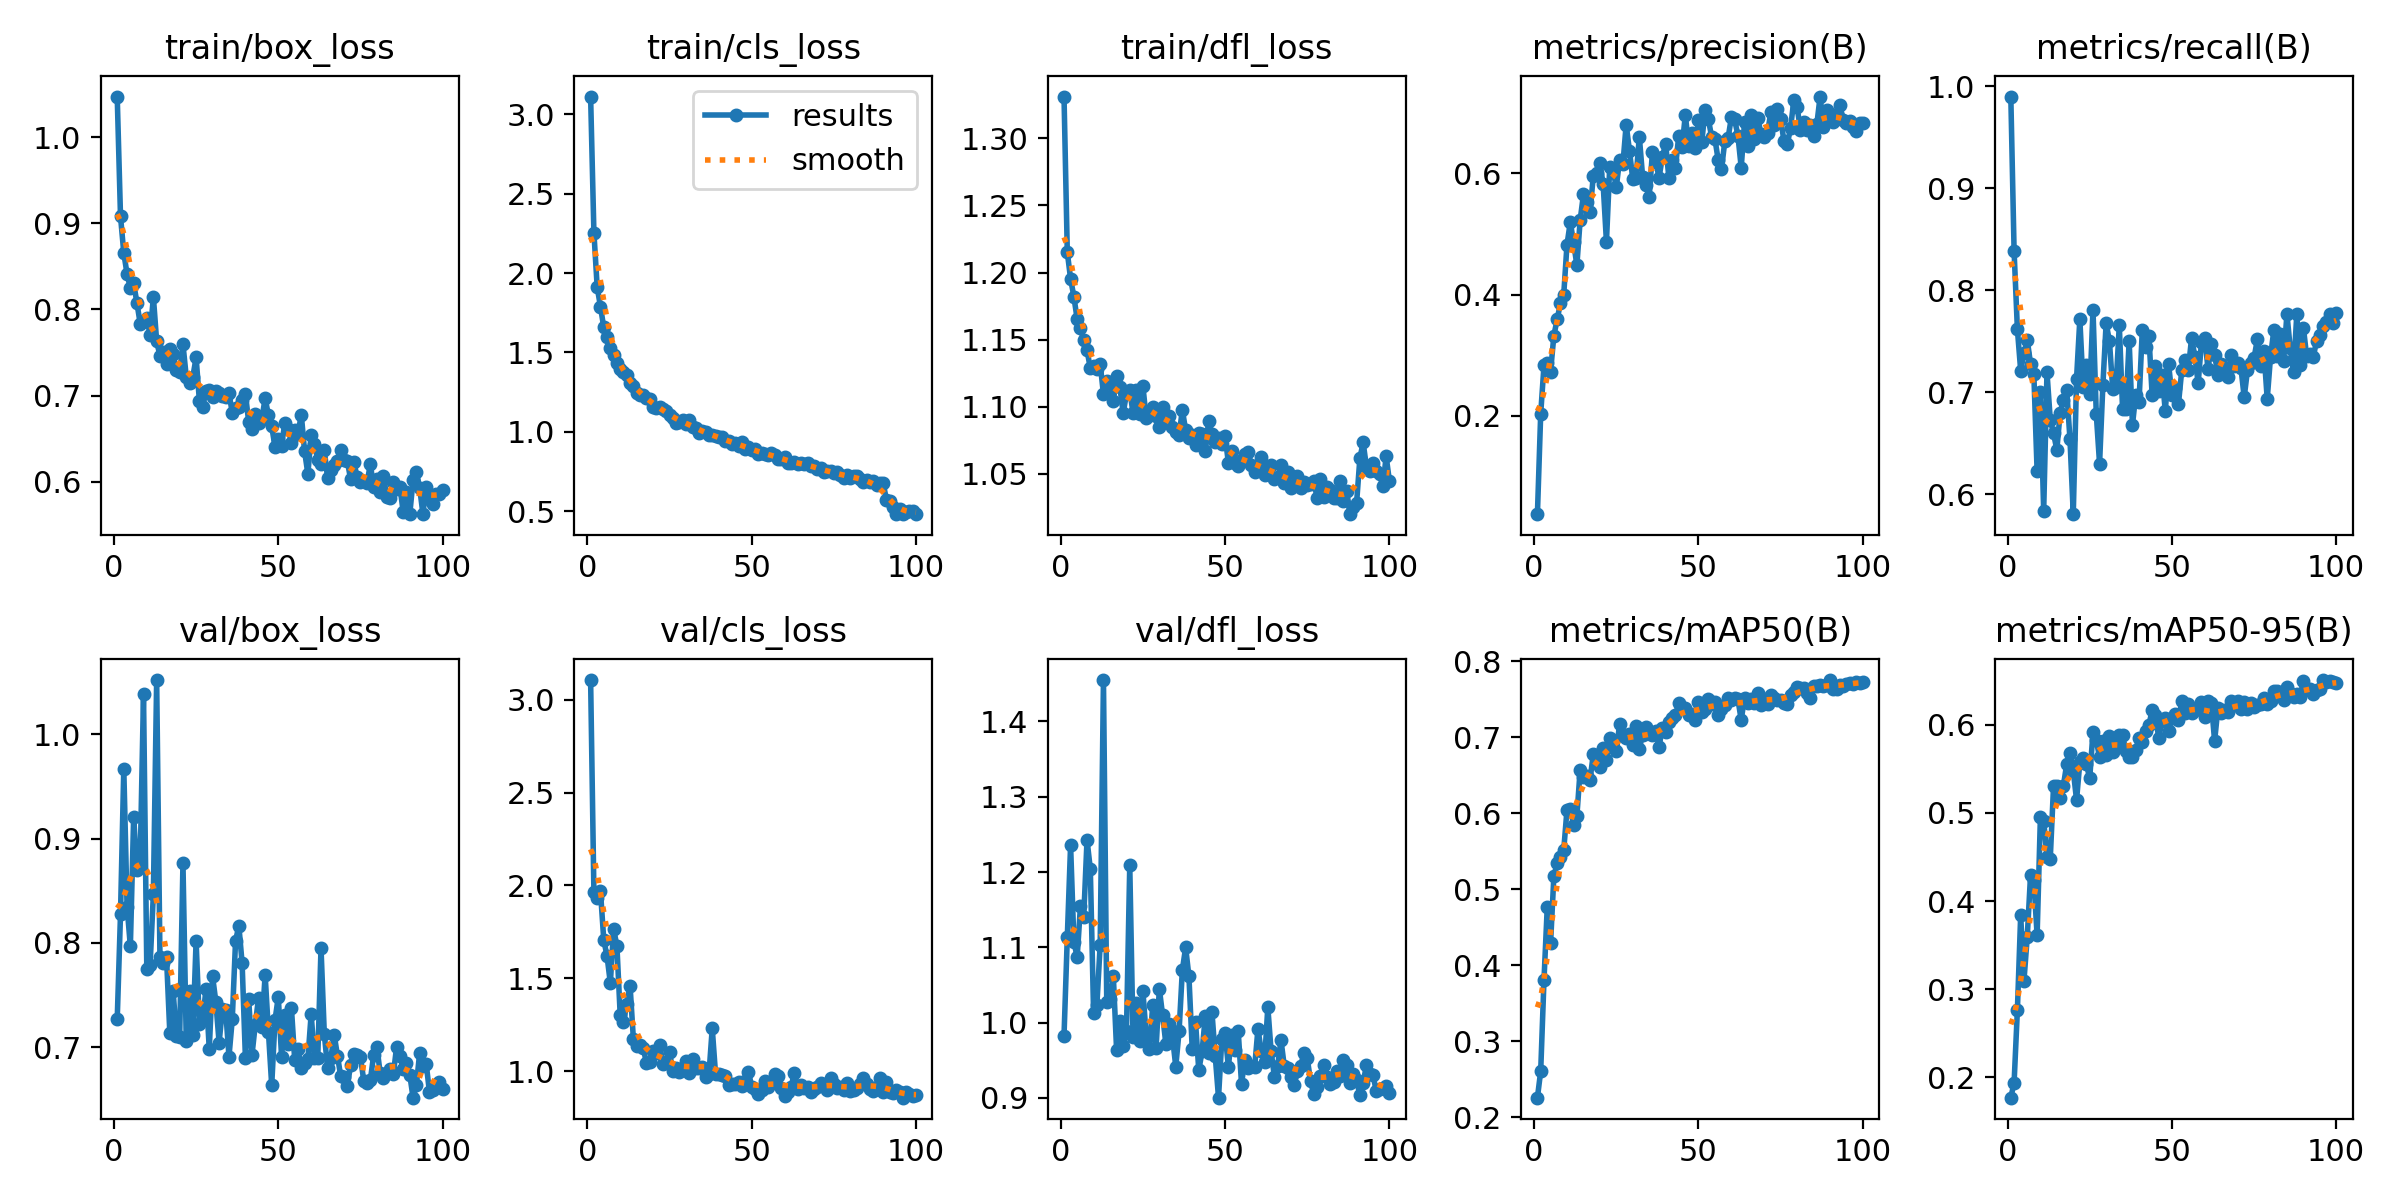

In [10]:
Image("/content/runs/detect/train/results.png", width=600)

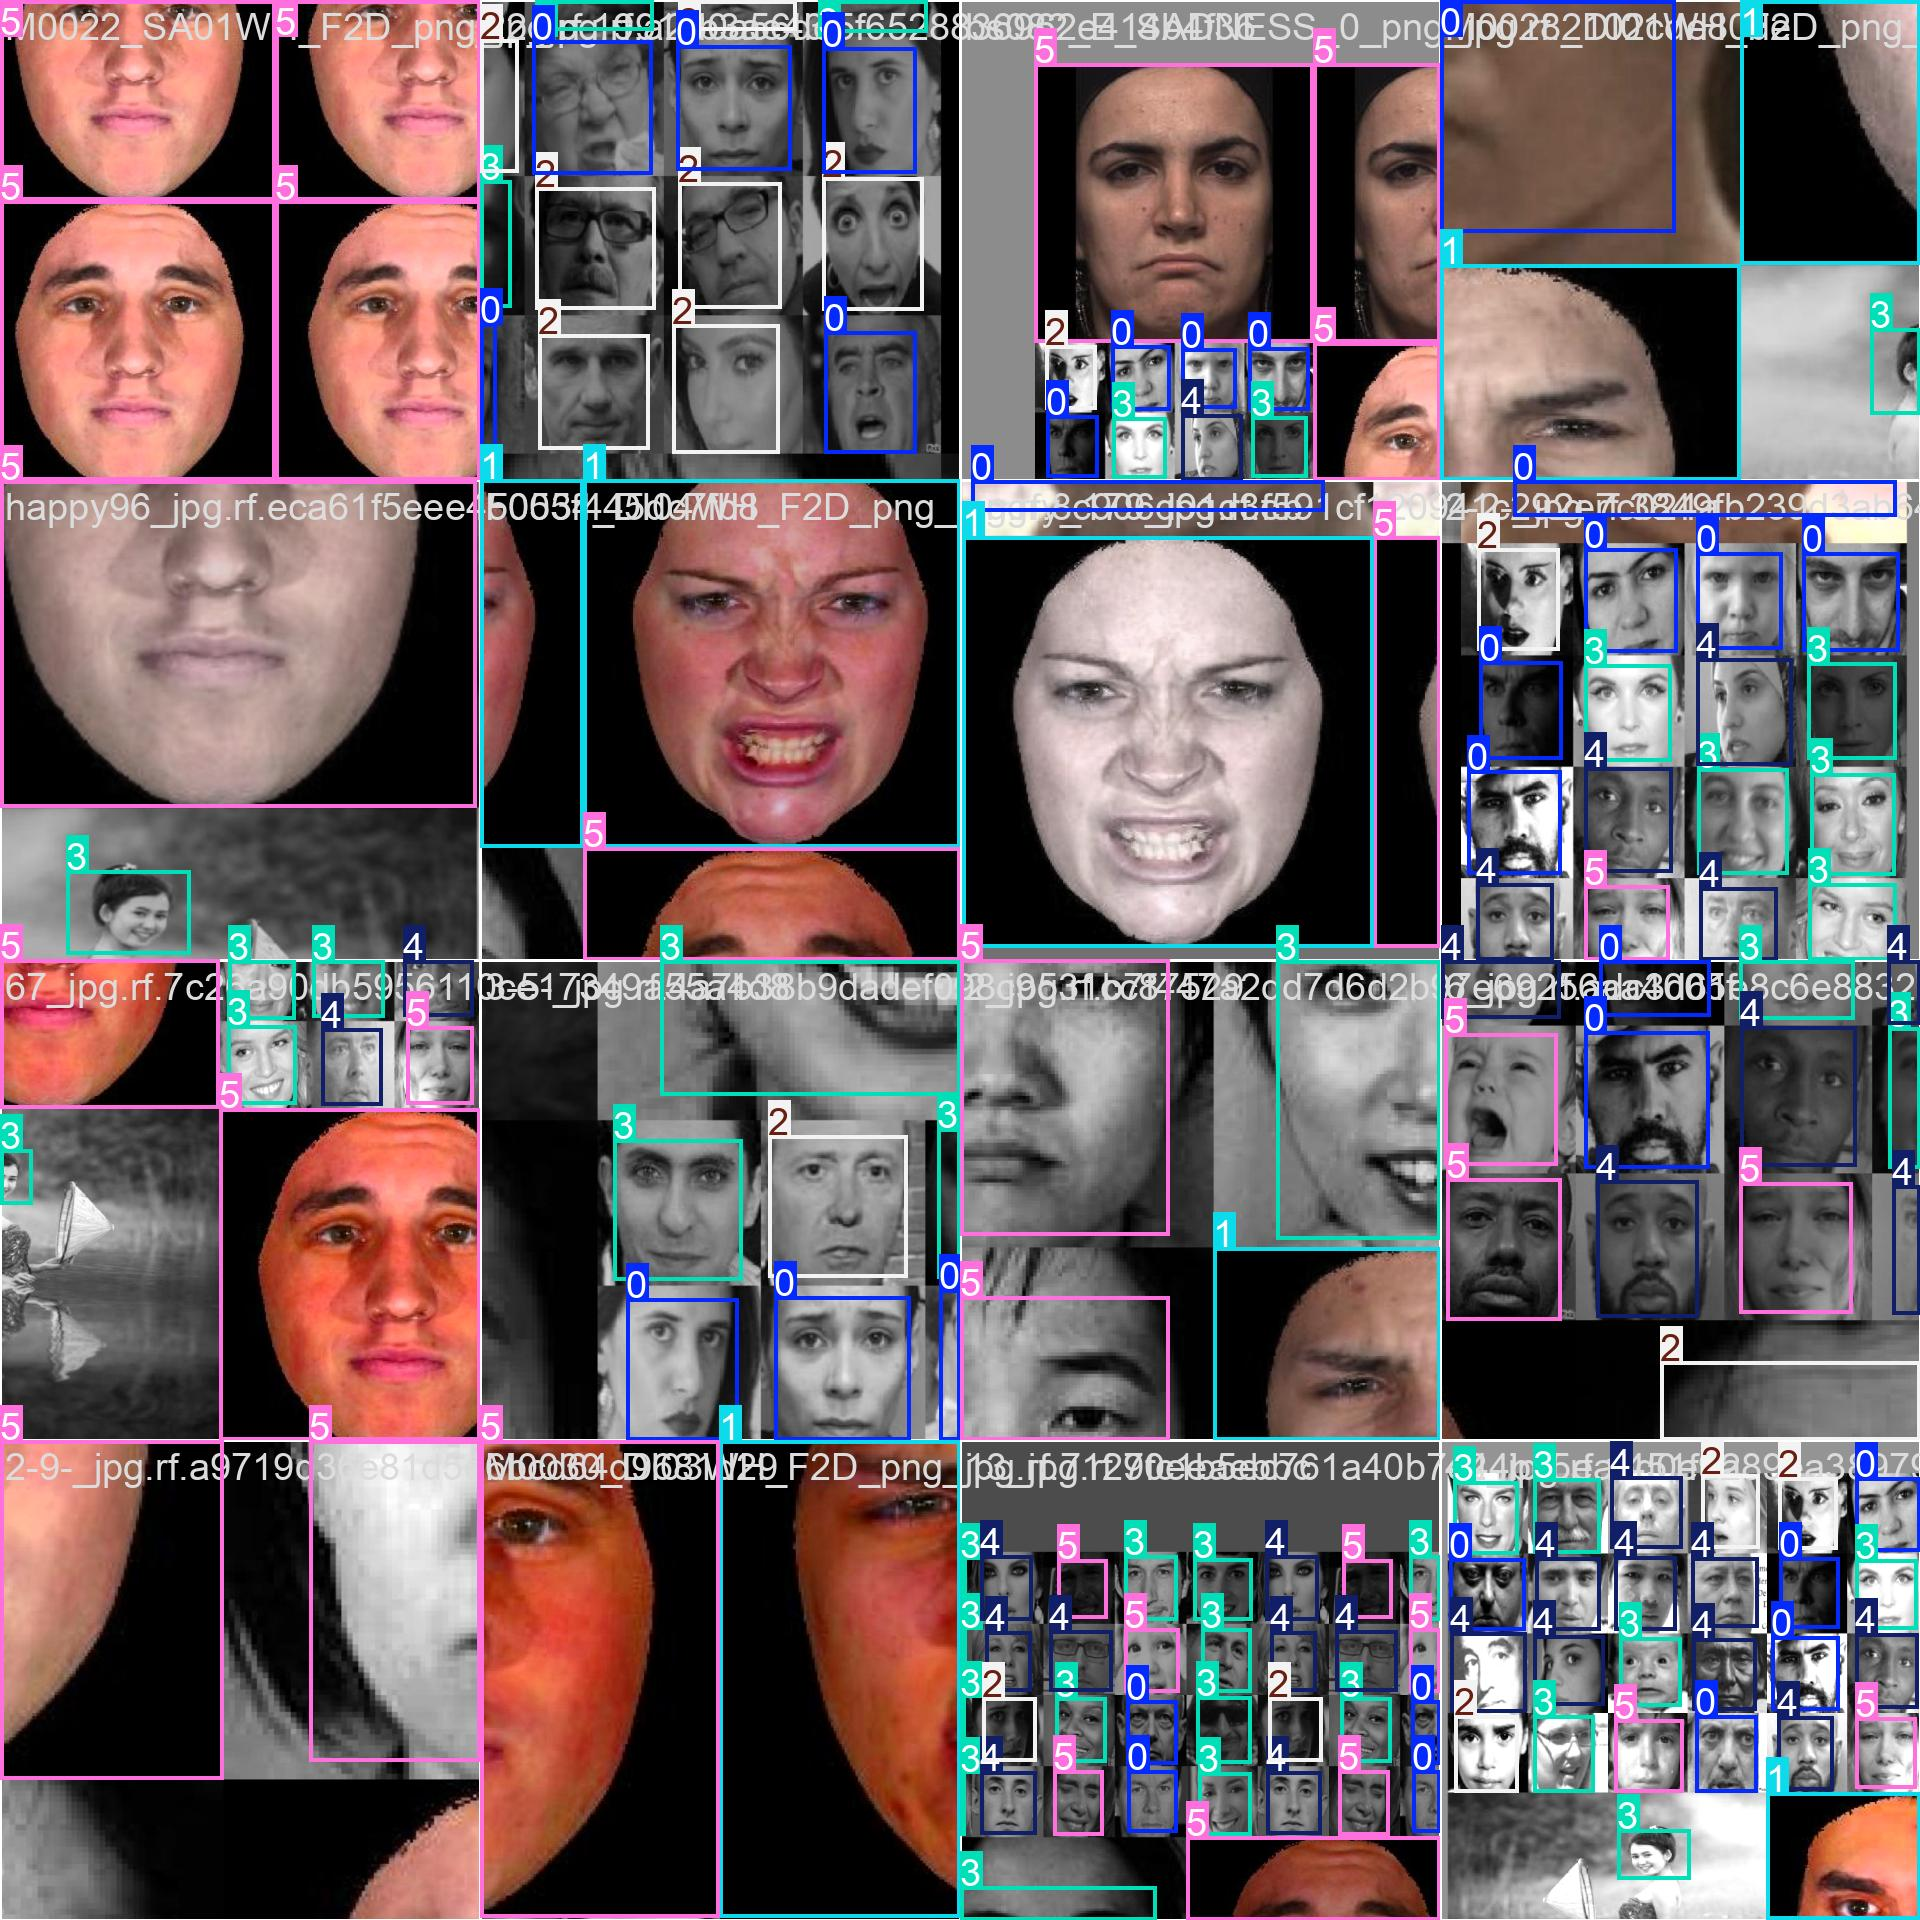

In [11]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

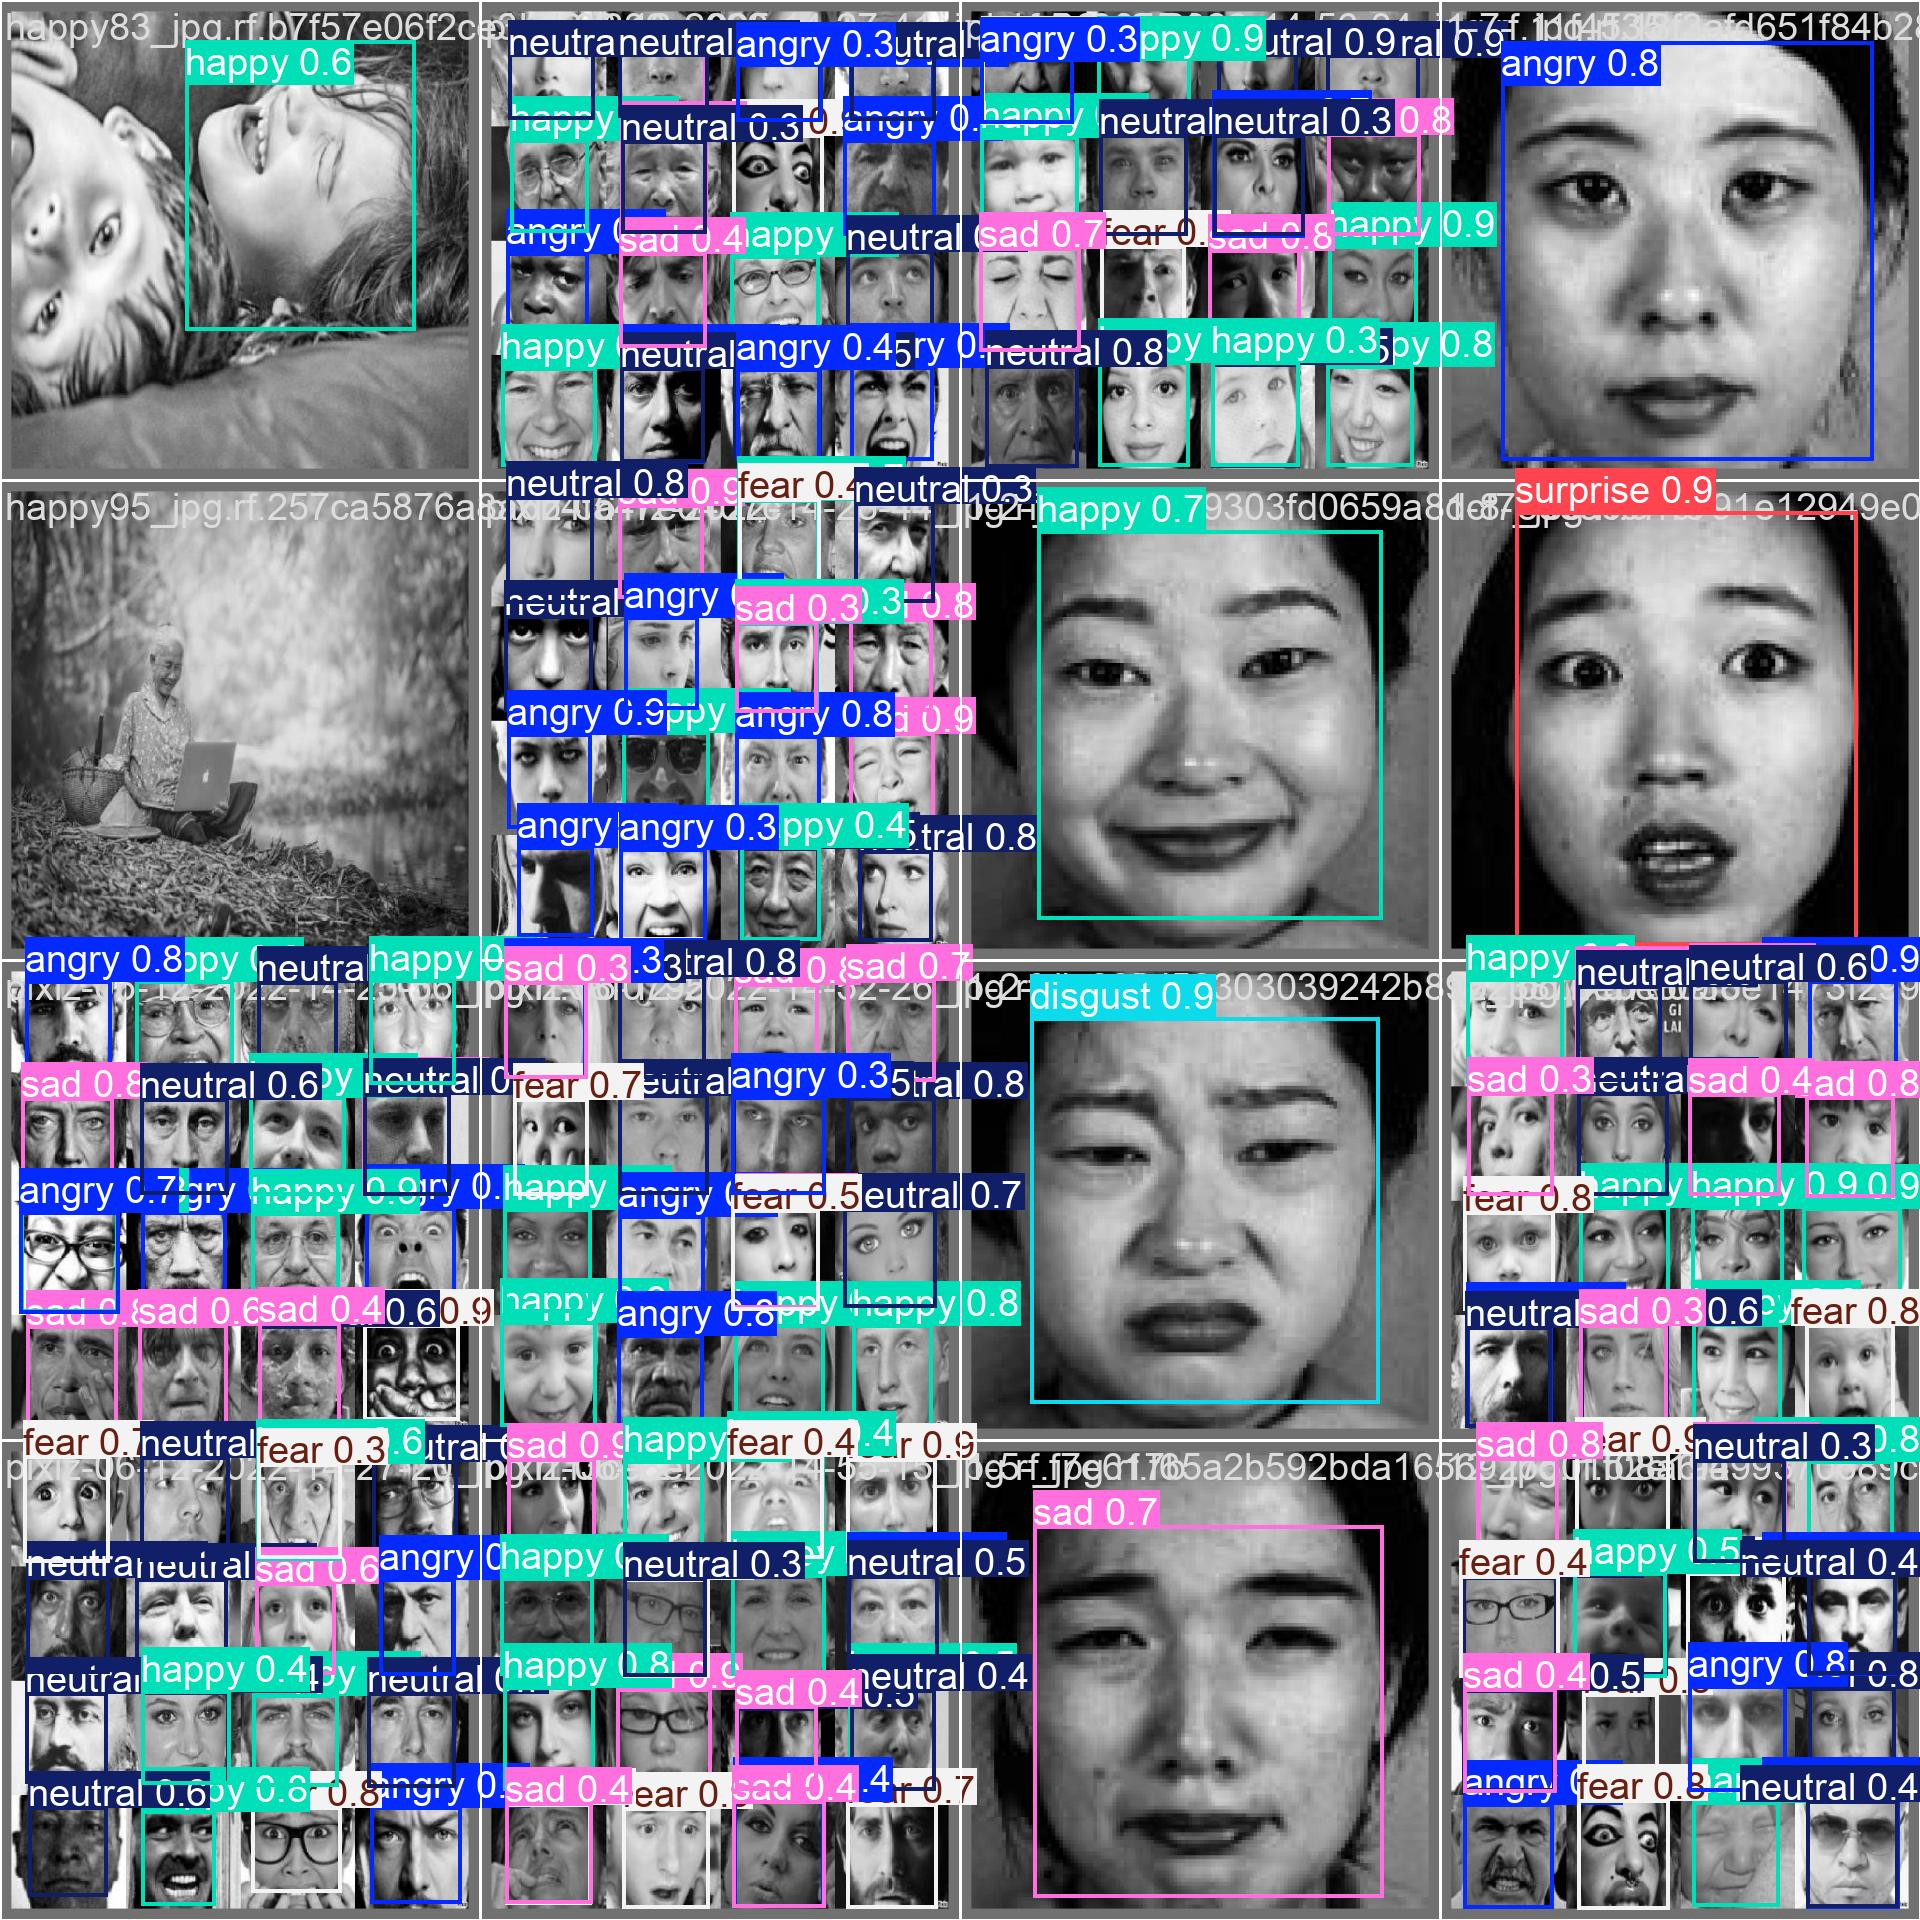

In [12]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [13]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100% 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:03<00:00,  3.43it/s]
                   all        185        862      0.684      0.773      0.771      0.651
                 angry         76        176      0.621       0.68      0.649      0.497
               disgust         18         18       0.79      0.944      0.957      0.939
                  fear         51        128       0.63      0.688      0.716      0.551
                 happy         64        180      0.725      0.833      0.853      0.637
               neutral         52        184      0.576      0.707      0.632      0.476
                   sad 

**Step # 08 Inference with Custom Model on Images**

In [14]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/99 /content/Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg: 640x640 1 angry, 12.0ms
image 2/99 /content/Facial-Emotion-Dataset--3/test/images/1-7-_jpg.rf.e66429ccfa57cb2c03c5e06fe43e3a8b.jpg: 640x640 1 fear, 1 sad, 10.2ms
image 3/99 /content/Facial-Emotion-Dataset--3/test/images/1-8-_jpg.rf.d4579ef9e8b6ca750aa61bd65ff33b47.jpg: 640x640 1 happy, 9.4ms
image 4/99 /content/Facial-Emotion-Dataset--3/test/images/10_jpg.rf.ce00a096968d9ce9ceb0a85b39e601cb.jpg: 640x640 6 angrys, 3 fears, 5 happys, 3 neutrals, 2 sads, 9.2ms
image 5/99 /content/Facial-Emotion-Dataset--3/test/images/14_jpg.rf.26f69d5d4bfeffe1665b1558c11f95e9.jpg: 640x640 1 angry, 8 fears, 1 happy, 4 neutrals, 2 sads, 9.0ms
image 6/99 /content/Facial-Emotion-Dataset--3/test/images/2-3-_jpg.rf.2d5cb265aa6d73

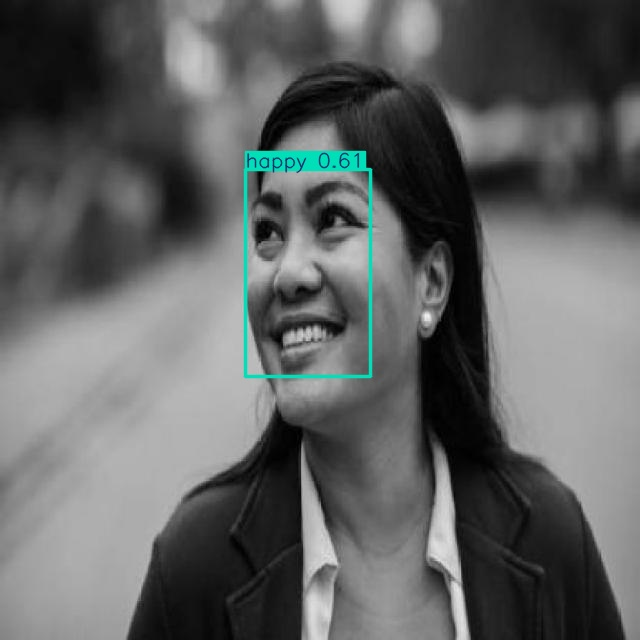

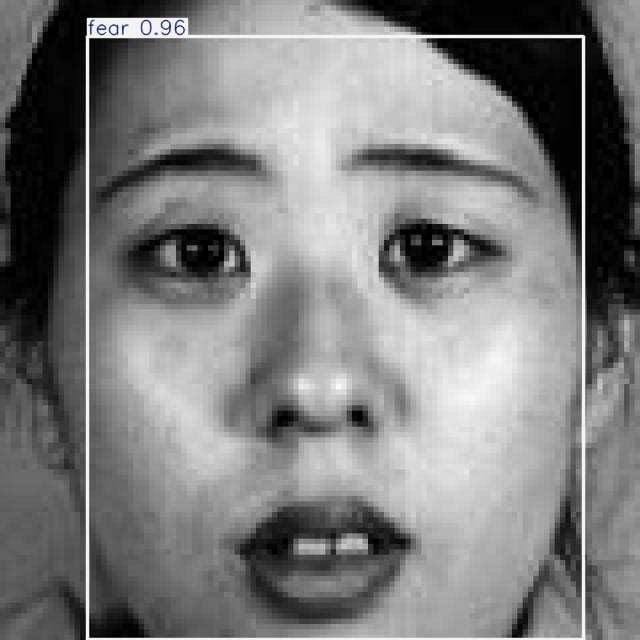

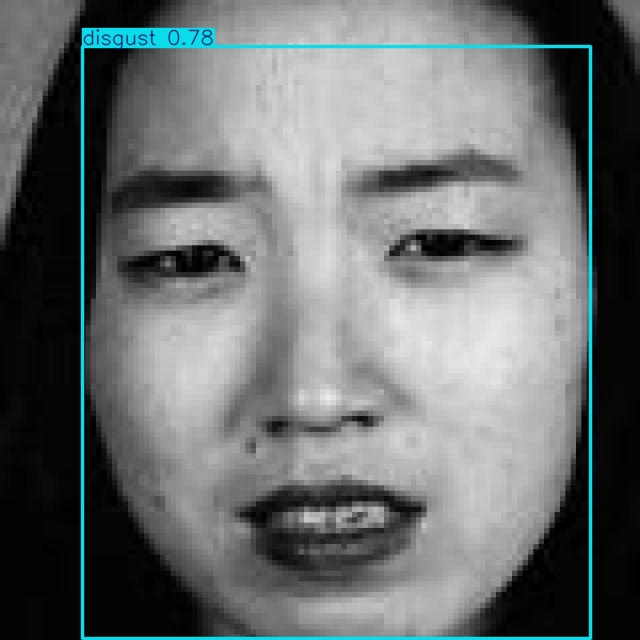

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")